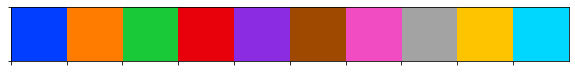

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
# sns.set_palette(palette1)
sns.set_palette("bright",10)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/CSSEGISandData/COVID-19/
# transpose matrices for better data handling
! curl https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv > ../external_data/dpc-covid19-ita-regioni.csv

# confirmed COVID-19 positive cases for Italy
data = pd.read_csv("../external_data/dpc-covid19-ita-regioni.csv")
data.head(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 61055  100 61055    0     0  61055      0  0:00:01 --:--:--  0:00:01  173k


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1,NaN,NaN
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1,NaN,NaN
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10,NaN,NaN
5,2020-02-24T18:00:00,ITA,8,Emilia Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,148,NaN,NaN
6,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,58,NaN,NaN
7,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,2,1,0,3,124,NaN,NaN
8,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,1,NaN,NaN
9,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,1463,NaN,NaN


In [3]:
# region_names = data["denominazione_regione"].unique()
dates = data["data"].unique()
conf = pd.DataFrame(columns = ["data"])
conf["data"] = dates
deaths = pd.DataFrame(columns = ["data"])
deaths["data"] = dates
tests = pd.DataFrame(columns = ["data"])
tests["data"] = dates

In [4]:
for name, group in data.groupby('denominazione_regione'):
    conf = conf.merge(group[["totale_casi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    conf.rename(columns={"totale_casi": name}, inplace=True)
    deaths = deaths.merge(group[["deceduti","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    deaths.rename(columns={"deceduti": name}, inplace=True)
    tests = tests.merge(group[["tamponi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    tests.rename(columns={"tamponi": name}, inplace=True)
    
conf.set_index('data', inplace=True)
conf.index = pd.to_datetime(conf.index).date
deaths.set_index('data', inplace=True)
deaths.index = pd.to_datetime(deaths.index).date
tests.set_index('data', inplace=True)
tests.index = pd.to_datetime(tests.index).date

conf.tail()

,Abruzzo,Basilicata,Calabria,Campania,Emilia Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Bolzano,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto
2020-03-21,529,66,235,844,6705,790,1190,1436,25515,2153,...,621,782,3752,675,330,490,2012,462,313,4617
2020-03-22,587,81,273,936,7555,874,1383,1665,27206,2421,...,678,954,4420,786,339,630,2277,521,364,5122
2020-03-23,663,90,292,1026,8535,930,1540,1924,28761,2569,...,724,1023,4861,906,359,721,2461,577,393,5505
2020-03-24,689,92,319,1101,9254,992,1728,2116,30703,2736,...,781,1110,5515,1005,421,846,2699,648,400,5948
2020-03-25,813,113,351,1199,10054,1139,1901,2305,32346,2934,...,858,1222,6024,1093,442,994,2972,710,401,6442


In [5]:
# select only countries with > 200 positive COVID-19 cases
contries_ordered = conf.max().sort_values(ascending=False)
print(contries_ordered[:10])

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

Lombardia         32346
Emilia Romagna    10054
Veneto             6442
Piemonte           6024
Toscana            2972
Marche             2934
Liguria            2305
Lazio              1901
P.A. Trento        1222
Campania           1199
dtype: int64


In [6]:
# latest number of cases by region
print(conf.max())

Abruzzo                    813
Basilicata                 113
Calabria                   351
Campania                  1199
Emilia Romagna           10054
Friuli Venezia Giulia     1139
Lazio                     1901
Liguria                   2305
Lombardia                32346
Marche                    2934
Molise                      73
P.A. Bolzano               858
P.A. Trento               1222
Piemonte                  6024
Puglia                    1093
Sardegna                   442
Sicilia                    994
Toscana                   2972
Umbria                     710
Valle d'Aosta              401
Veneto                    6442
dtype: int64


In [7]:
# remove Cruise Ship
# conf.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)

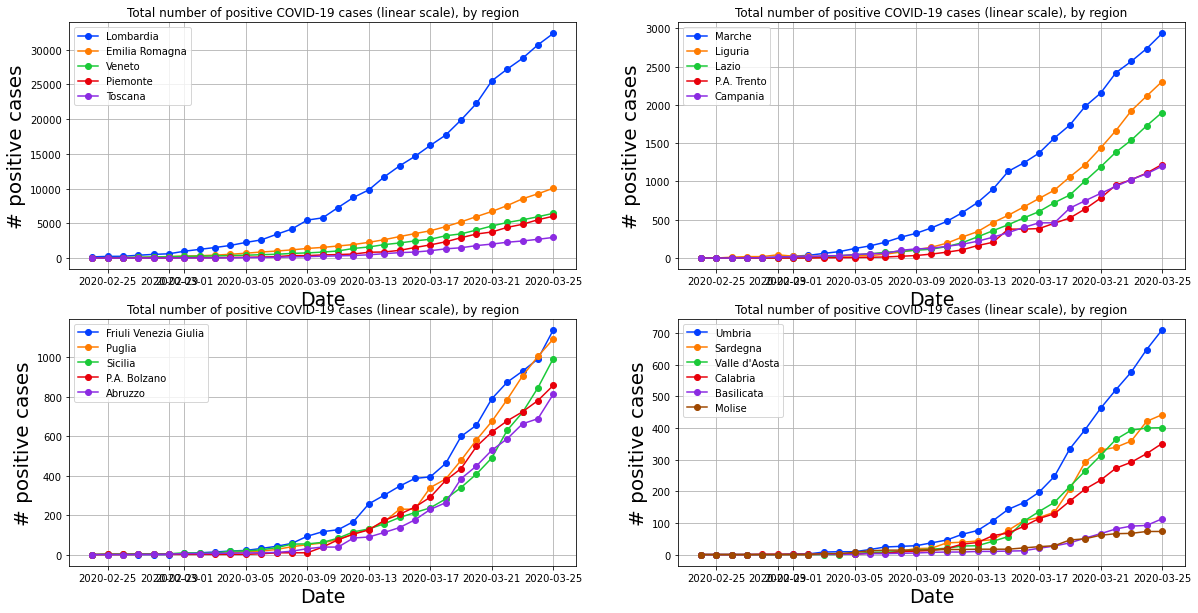

In [8]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        conf[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Total number of positive COVID-19 cases (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# positive cases", fontsize=20)
        count+=1

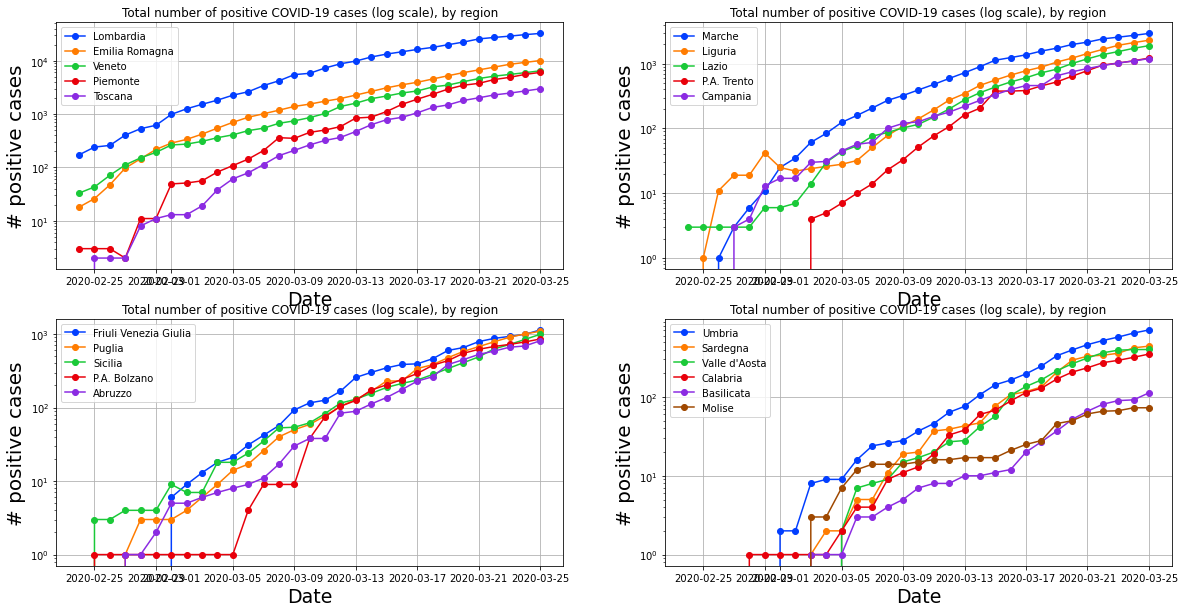

In [9]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        conf[plot_countries].plot(logy=True, grid=True, marker='o', ax=axes[r,c],
                 title='Total number of positive COVID-19 cases (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# positive cases", fontsize=20)
        count+=1

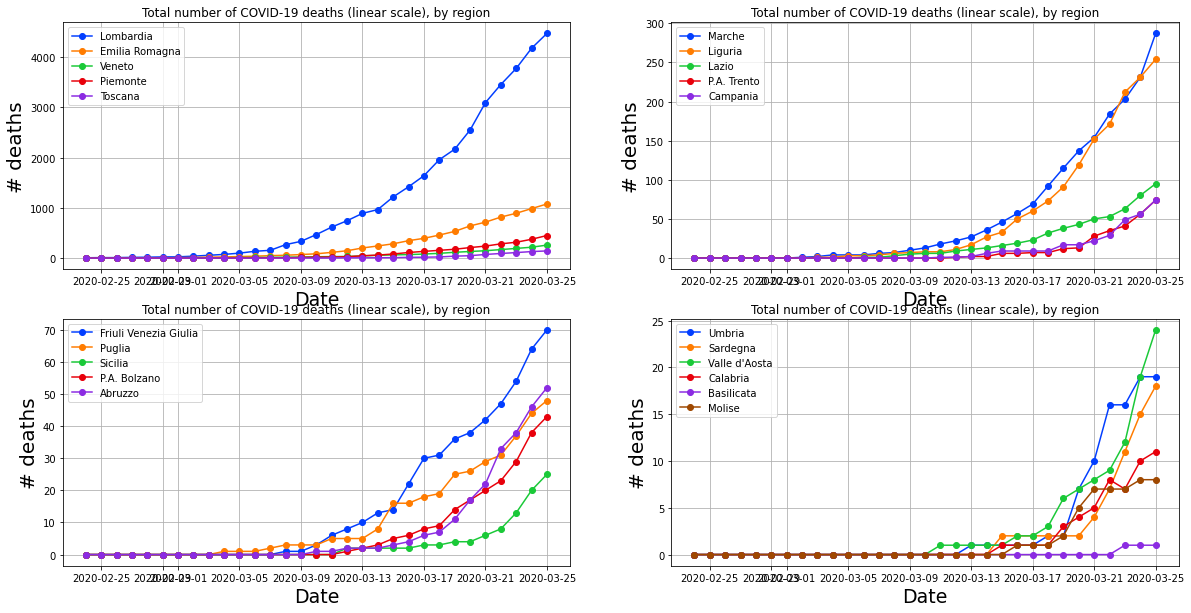

In [10]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Total number of COVID-19 deaths (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# deaths", fontsize=20)
        count+=1

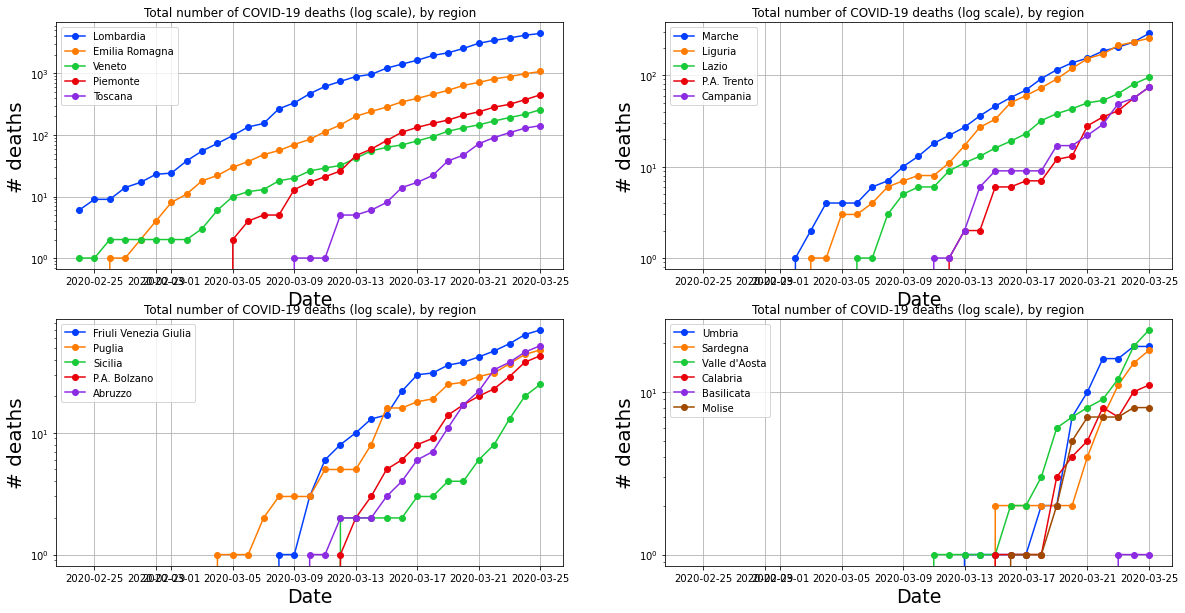

In [11]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths[plot_countries].plot(logy=True, grid=True, marker='o', ax=axes[r,c],
                 title='Total number of COVID-19 deaths (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# deaths", fontsize=20)
        count+=1

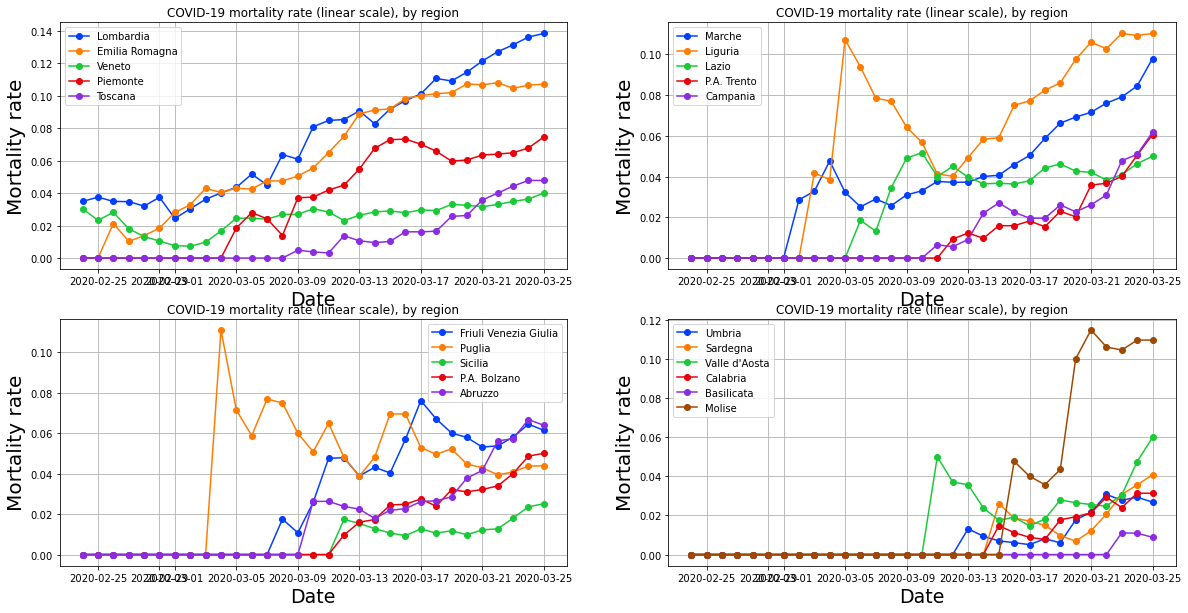

In [12]:
mortality = deaths.divide(conf.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        mortality[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='COVID-19 mortality rate (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Mortality rate", fontsize=20)
        # axes[r,c].set_ylim(0,0.12)
        count+=1

In [13]:
# retrieve population information
# source http://dati-censimentopopolazione.istat.it/Index.aspx?lang=en
population = pd.read_csv("../external_data/DICA_POP_RESPRE_Data_9d65c5fb-6eaa-413c-a013-61a8ad3bce06.csv", encoding = "ISO-8859-1")

In [14]:
# rename population country names that don't match COVID-19 data
population = population.replace('Emilia-Romagna', 'Emilia Romagna')
population = population.replace('Friuli-Venezia Giulia', 'Friuli Venezia Giulia')
population = population.replace("Valle d'Aosta / Vallée d'Aoste", "Valle d\'Aosta")
print(population["Territory"])

0       Bologna
1       Bologna
2       Bologna
3       Bologna
4       Bologna
         ...   
3397    Trieste
3398    Venezia
3399    Venezia
3400     Verona
3401     Verona
Name: Territory, Length: 3402, dtype: object


In [15]:
population = population[(population["Territory"].isin(set(list(conf.columns.values)))) & 
                       (population["Data type"] == "present population (absolute values)") &
                       (population["Gender"] == "total") &
                       (population["Age"] == "total") ]
population = population[["Territory","0"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population = population.loc[:,~population.columns.duplicated()]

In [16]:
# create copy
conf_no_norm = conf.copy()

# concatenate dataset
conf_population_norm = pd.concat([population,conf])
conf_population_norm.head()

,Piemonte,Valle d'Aosta,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia Romagna,Toscana,Umbria,Marche,...,Abruzzo,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna,P.A. Bolzano,P.A. Trento
0,4.39384e+06,128664,1.60573e+06,9.80737e+06,4.95495e+06,1.23702e+06,4.44907e+06,3.76008e+06,917784,1.59126e+06,...,1.31404e+06,308967,5.84041e+06,4.09045e+06,573458,1.93658e+06,5.1511e+06,1.64133e+06,NaN,NaN
2020-02-24,3,0,0,172,33,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2020-02-25,3,0,1,240,43,0,26,2,0,0,...,0,0,0,0,0,0,3,0,1.0,0.0
2020-02-26,3,0,11,258,71,0,47,2,0,1,...,0,0,0,0,0,0,3,0,1.0,0.0
2020-02-27,2,0,19,403,111,0,97,2,0,3,...,1,0,3,1,0,0,4,0,1.0,0.0


In [17]:
# divide cases rows by population/10/1e3 row to obtain number of cases per 1e4 persons
conf_population_norm = conf_population_norm.loc[:].div(conf_population_norm.iloc[0][:]/10/1e3)

In [18]:
# remove population row
conf_population_norm = conf_population_norm.iloc[1:]
conf_population_norm.dropna(axis=1, inplace=True)
conf_population_norm.tail()

,Piemonte,Valle d'Aosta,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia Romagna,Toscana,Umbria,Marche,Lazio,Abruzzo,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna
2020-03-21,8.53923,24.3269,8.94298,26.0161,9.31795,6.38629,15.0706,5.35095,5.03386,13.5301,2.09526,4.02574,1.97432,1.4451,1.65018,1.15091,1.21348,0.951254,2.01056
2020-03-22,10.0595,28.2907,10.3691,27.7404,10.3371,7.06534,16.9811,6.05573,5.67672,15.2143,2.43508,4.46712,2.13615,1.60263,1.92155,1.41248,1.4097,1.22304,2.0654
2020-03-23,11.0632,30.5447,11.9821,29.3259,11.1101,7.51804,19.1838,6.54508,6.28688,16.1444,2.71151,5.04549,2.16852,1.75673,2.21491,1.56943,1.50782,1.3997,2.18725
2020-03-24,12.5517,31.0887,13.1778,31.306,12.0042,8.01924,20.7999,7.17804,7.06048,17.1939,3.04253,5.24335,2.36271,1.88514,2.45694,1.6043,1.64724,1.64237,2.56499
2020-03-25,13.7101,31.1664,14.3549,32.9813,13.0011,9.20757,22.598,7.90409,7.73603,18.4382,3.34714,6.187,2.36271,2.05294,2.67208,1.9705,1.81248,1.92969,2.69294


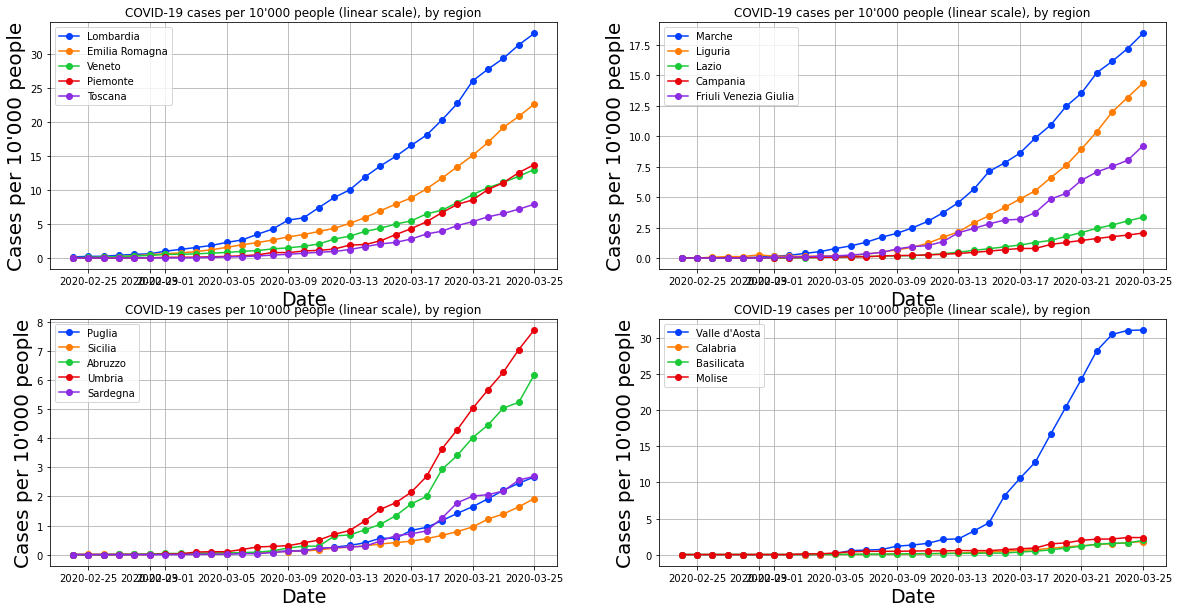

In [19]:
contries_ordered2 = [country for country in contries_ordered.index.to_list() if not "P.A." in country]

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        conf_population_norm[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title="COVID-19 cases per 10'000 people (linear scale), by region", figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Cases per 10'000 people", fontsize=20)
        count+=1

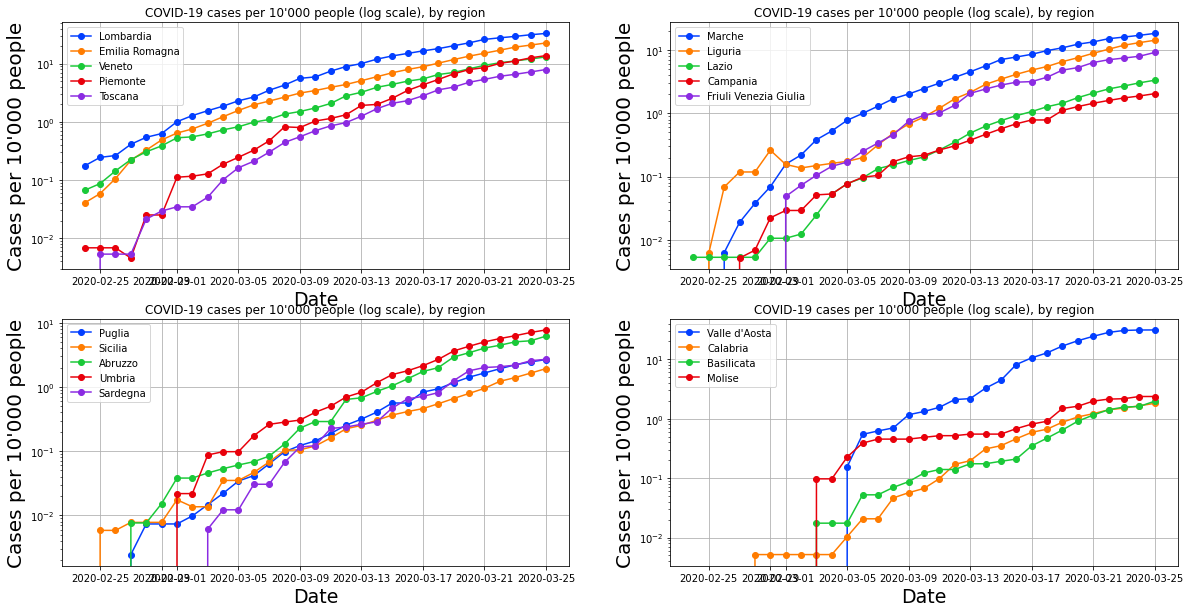

In [20]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        conf_population_norm[plot_countries].plot(logy=True, grid=True, marker='o', ax=axes[r,c],
                 title="COVID-19 cases per 10'000 people (log scale), by region", figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Cases per 10'000 people", fontsize=20)
        count+=1

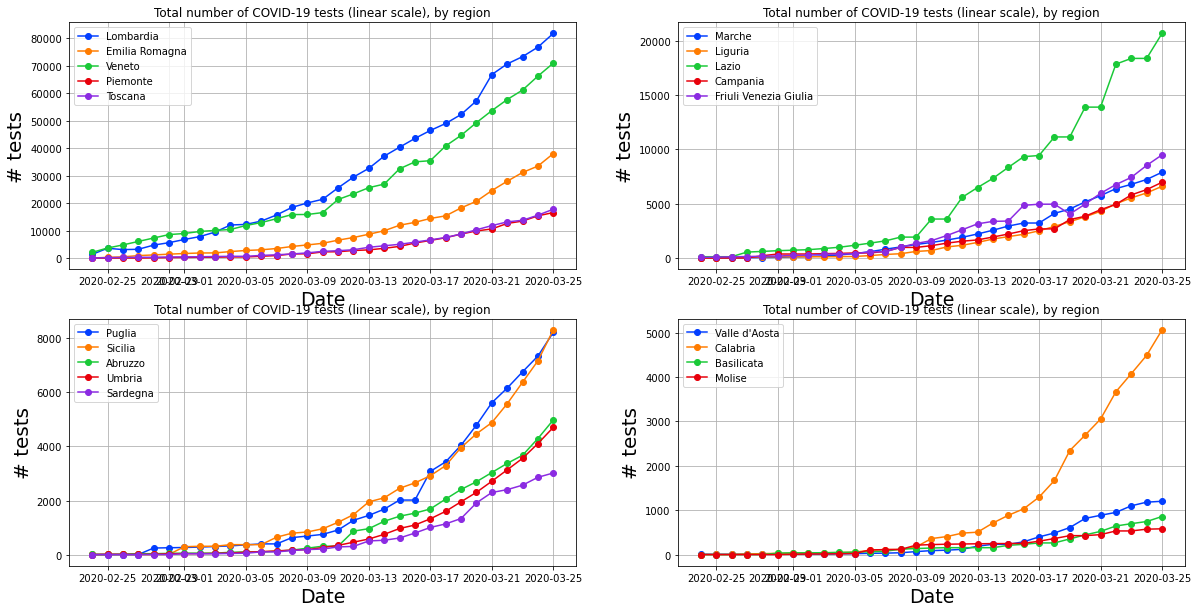

In [21]:
contries_ordered2 = [country for country in contries_ordered.index.to_list() if not "P.A." in country]

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        tests[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Total number of COVID-19 tests (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# tests", fontsize=20)
        count+=1

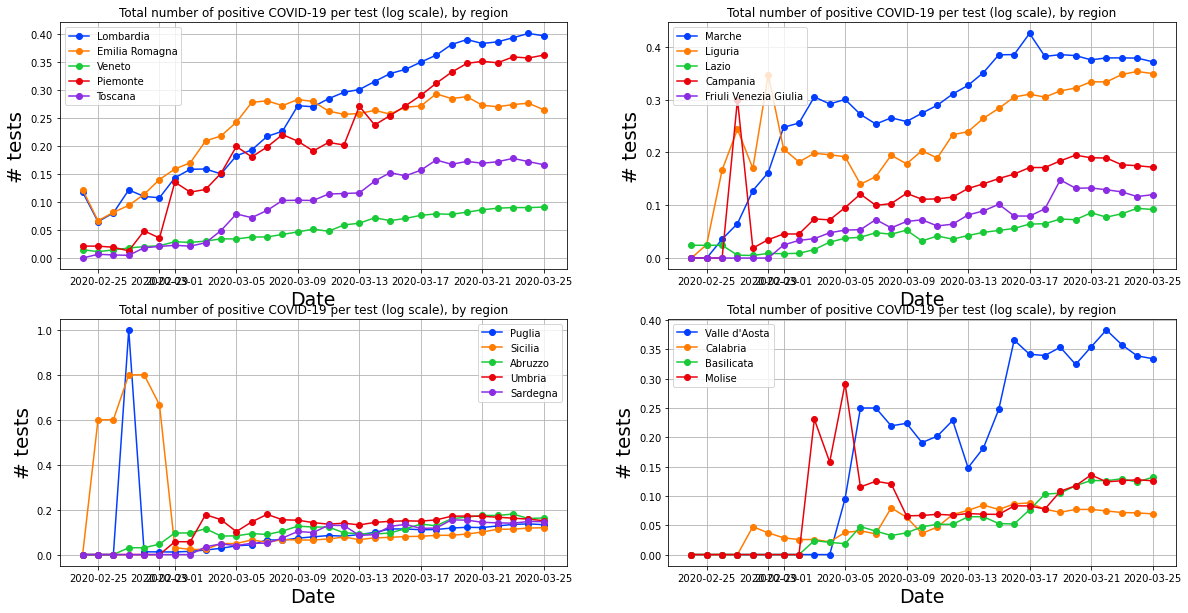

In [22]:
conf_per_test = conf_no_norm.divide(tests.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        conf_per_test[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Total number of positive COVID-19 per test (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("# tests", fontsize=20)
        count+=1

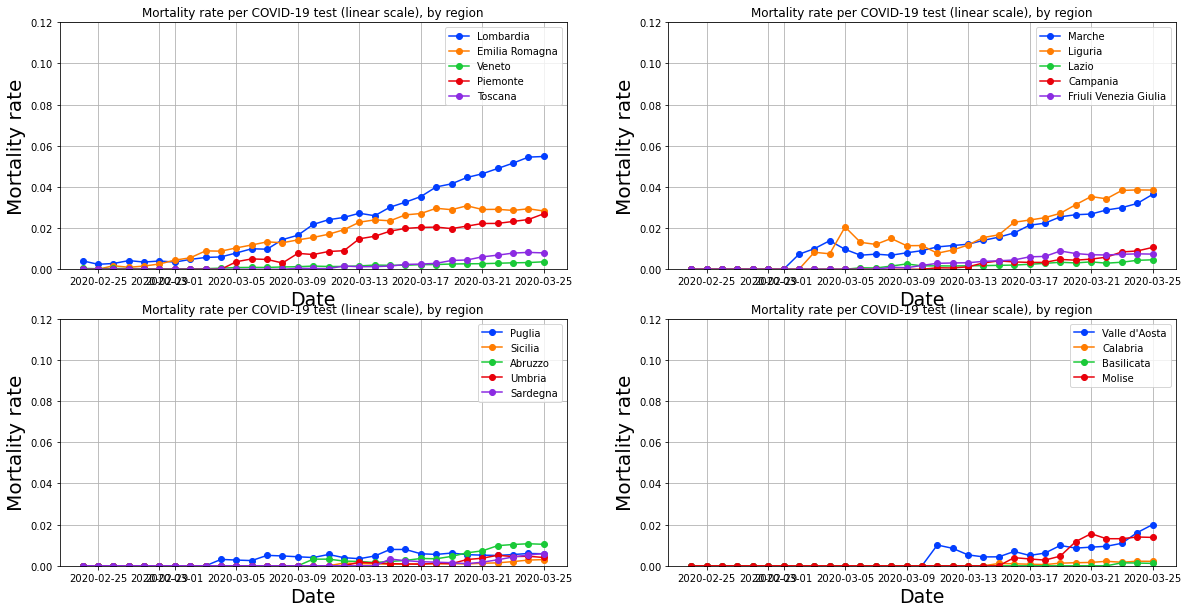

In [23]:
mortality_per_test = deaths.divide(tests.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        mortality_per_test[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Mortality rate per COVID-19 test (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Mortality rate", fontsize=20)
        axes[r,c].set_ylim(0,0.12)
        count+=1

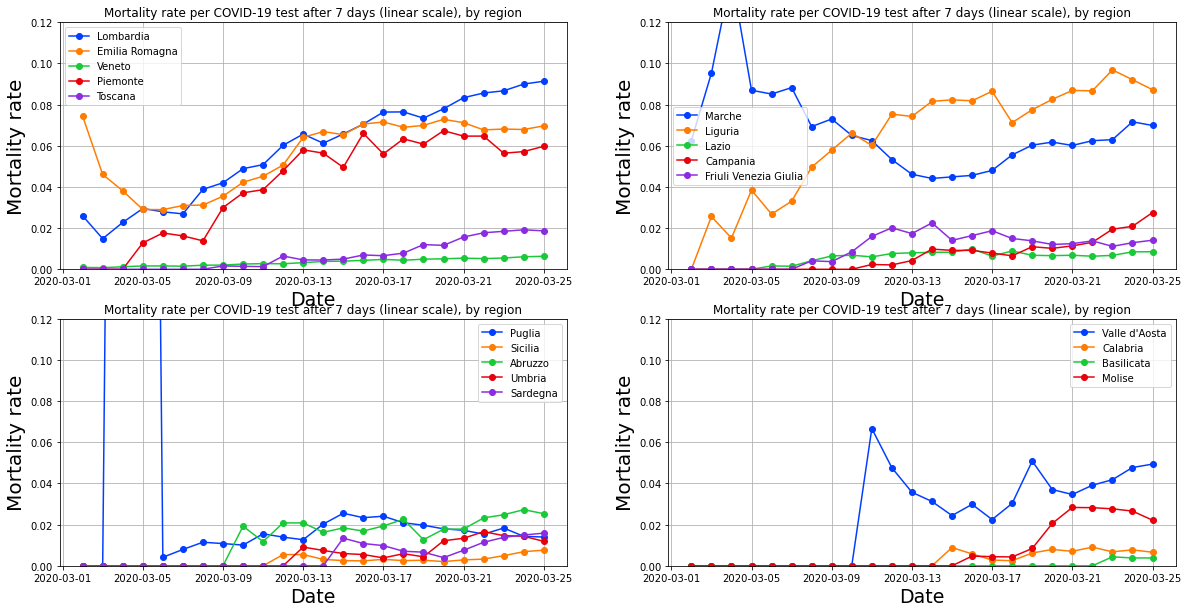

In [24]:
tests_7d_ago = tests[tests.columns.values].shift(7)
tests_7d_ago = tests_7d_ago.dropna()

mortality_after_7d_per_test = deaths.divide(tests_7d_ago.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        mortality_after_7d_per_test[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Mortality rate per COVID-19 test after 7 days (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Mortality rate", fontsize=20)
        axes[r,c].set_ylim(0,0.12)

        count+=1

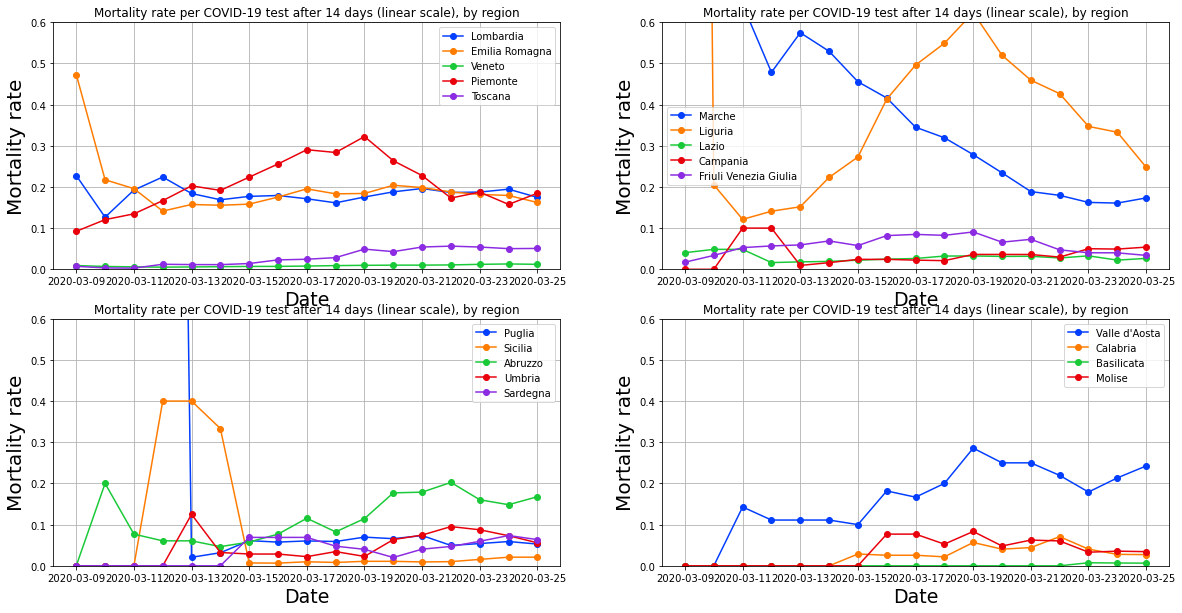

In [25]:
tests_14d_ago = tests[tests.columns.values].shift(14)
tests_14d_ago = tests_14d_ago.dropna()

mortality_after_14d_per_test = deaths.divide(tests_14d_ago.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        mortality_after_14d_per_test[plot_countries].plot(grid=True, marker='o', ax=axes[r,c],
                 title='Mortality rate per COVID-19 test after 14 days (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=19)
        axes[r,c].set_ylabel("Mortality rate", fontsize=20)
        axes[r,c].set_ylim(0,0.6)
        count+=1